In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N, D_in, H, D_out = 2, 100, 50, 1

In [4]:
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

print(x.shape)
print(y.shape)

(2, 100)
(2, 1)


In [6]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [10]:
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(500):
    h = x.dot(w1)
    h_relu = np.maximum(h,0)
    y_pred = h_relu.dot(w2)
    y_pred_list.append(y_pred[0][0])

    loss = np.square(y_pred - y).sum()
    loss_list.append(loss)
    print(t, loss)

    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)

    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 722.9198566543721
1 708.3200896798444
2 694.0236647320556
3 680.0240654423145
4 666.3149210888005
5 652.890003178972
6 639.7432221172849
7 626.8686239559032
8 614.2603872261915
9 601.9128198487709
10 589.8203561201158
11 577.9775537735353
12 566.3790911126589
13 555.0197642154402
14 543.8944842068306
15 532.9982745982974
16 522.3262686924456
17 511.87370705099613
18 501.6359350244984
19 491.6084003421174
20 481.786650759991
21 472.16633176654767
22 462.74318434339466
23 453.51304278026356
24 444.4718325426701
25 435.6155681908852
26 426.9403513489399
27 418.4423687223442
28 410.11789016328805
29 401.9632667821202
30 393.97492910390963
31 386.1493852689513
32 378.4832192760869
33 370.9730892677939
34 363.61572585594286
35 356.40793048721815
36 349.34657384721356
37 342.42859430221137
38 335.6509963777113
39 329.01084927279794
40 322.5052854094306
41 316.13149901580664
42 309.8867447429434
43 303.7683363136512
44 297.77364520309936
45 291.90009935019214
46 286.1451818989959
47 280.5064

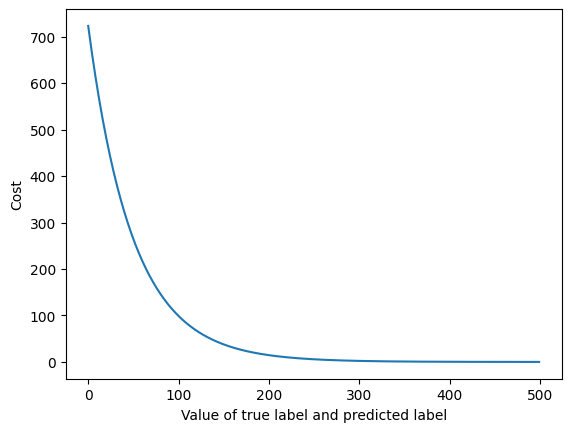

In [12]:
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Value of true label and predicted label')
plt.show()